Lambda School Data Science

*Unit 2, Sprint 3, Module 2*

---


# Wrangle ML datasets

- [ ] Continue to clean and explore your data. 
- [ ] For the evaluation metric you chose, what score would you get just by guessing?
- [ ] Can you make a fast, first model that beats guessing?

**We recommend that you use your portfolio project dataset for all assignments this sprint.**

**But if you aren't ready yet, or you want more practice, then use the New York City property sales dataset for today's assignment.** Follow the instructions below, to just keep a subset for the Tribeca neighborhood, and remove outliers or dirty data. [Here's a video walkthrough](https://youtu.be/pPWFw8UtBVg?t=584) you can refer to if you get stuck or want hints!

- Data Source: [NYC OpenData: NYC Citywide Rolling Calendar Sales](https://data.cityofnewyork.us/dataset/NYC-Citywide-Rolling-Calendar-Sales/usep-8jbt)
- Glossary: [NYC Department of Finance: Rolling Sales Data](https://www1.nyc.gov/site/finance/taxes/property-rolling-sales-data.page)

In [1]:
# library imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
!pip install category_encoders==2.*
!pip install eli5
!pip install pdpbox
!pip install shap

In [2]:
# read in dataset
df = pd.read_excel('MySpotifyPlaylistsData.xlsx')
df.head()

,title,artist,top genre,year,added,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
0,goosebumps,Travis Scott,rap,2016,2020‑08‑24,130,73,84,-3,15,43,244,8,5,90
1,lovely (with Khalid),Billie Eilish,electropop,2018,2020‑08‑24,115,30,35,-10,10,12,200,93,3,89
2,Jocelyn Flores,XXXTENTACION,emo rap,2017,2020‑08‑24,134,39,87,-9,30,44,119,47,24,88
3,SAD!,XXXTENTACION,emo rap,2018,2020‑08‑24,75,61,74,-5,12,47,167,26,14,87
4,Everybody Dies In Their Nightmares,XXXTENTACION,emo rap,2017,2020‑08‑24,130,57,73,-7,11,69,95,85,13,84


In [3]:
df.describe()

,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
count,2963.000000,2963.000000,2963.000000,2963.000000,2963.000000,2963.000000,2963.000000,2963.000000,2963.000000,2963.00000,2963.000000
mean,2016.498144,112.979075,48.031050,64.813365,-9.072899,16.842052,42.911914,194.145798,42.049612,13.83699,51.541006
std,37.181993,31.761682,19.311942,13.737308,3.618742,12.435656,22.335648,67.498786,30.166876,12.84082,15.548901
min,0.000000,0.000000,1.000000,0.000000,-32.000000,2.000000,0.000000,22.000000,0.000000,0.00000,0.000000
25%,2016.000000,86.000000,34.000000,56.000000,-11.000000,10.000000,24.000000,153.000000,13.000000,5.00000,40.000000
50%,2017.000000,105.000000,47.000000,66.000000,-9.000000,12.000000,42.000000,194.000000,39.000000,9.00000,52.000000
75%,2019.000000,136.000000,62.000000,75.000000,-7.000000,18.000000,59.000000,232.000000,69.000000,19.00000,62.000000
max,2020.000000,241.000000,100.000000,97.000000,-1.000000,96.000000,99.000000,733.000000,99.000000,93.00000,99.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2963 entries, 0 to 2962
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   title      2963 non-null   object
 1   artist     2963 non-null   object
 2   top genre  2833 non-null   object
 3   year       2963 non-null   int64 
 4   added      2963 non-null   object
 5   bpm        2963 non-null   int64 
 6   nrgy       2963 non-null   int64 
 7   dnce       2963 non-null   int64 
 8   dB         2963 non-null   int64 
 9   live       2963 non-null   int64 
 10  val        2963 non-null   int64 
 11  dur        2963 non-null   int64 
 12  acous      2963 non-null   int64 
 13  spch       2963 non-null   int64 
 14  pop        2963 non-null   int64 
dtypes: int64(11), object(4)
memory usage: 347.4+ KB


What wrangling issues do we need to deal with?
- engineer target variable (valence>=60 = 1)
- high cardinality -- genre column?
- what to do with title and artist... potentially combine them and turn it into an index??
- drop useless columns (year and added)

In [5]:
def wrangle(df):
  df = df.copy()

  # Engineer new target variable
  df['positive'] = [1 if x>= 60 else 0 for x in df['val']]
  df = df.drop(['val'], axis=1)

  ## Drop high cardinality columns (removes title, artist, and genre)
  ## - let's keep genre and see if it helps the model
    
  unique_cats = df.select_dtypes('object').nunique()
  high_card_cols = [col for col in unique_cats.index if unique_cats[col] > 10]
  df = df.drop(high_card_cols, axis=1)

  # Drop useless columns
  df = df.drop(['year', 'added', 'dur'], axis=1)

  return df

In [6]:
df = wrangle(df)
df.head()

,bpm,nrgy,dnce,dB,live,acous,spch,pop,positive
0,130,73,84,-3,15,8,5,90,0
1,115,30,35,-10,10,93,3,89,0
2,134,39,87,-9,30,47,24,88,0
3,75,61,74,-5,12,26,14,87,0
4,130,57,73,-7,11,85,13,84,1


In [7]:
df.shape

(2963, 9)

In [8]:
df['positive'].value_counts()

0    2240
1     723
Name: positive, dtype: int64

#Split Data

In [9]:
target = 'positive'
y = df[target]
X = df.drop(target, axis=1)

In [10]:
#Train-val-test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42) # 0.25 x 0.8 = 0.2

In [11]:
print(X_train.shape)
print(X_test.shape)
print(X_val.shape)

(1896, 8)
(593, 8)
(474, 8)


# Establish Our Baseline

In [12]:
print('Baseline accuracy:', y_train.value_counts(normalize=True).max())

Baseline accuracy: 0.7631856540084389


# Build Models

In [13]:
from sklearn.impute import SimpleImputer
import category_encoders as ce
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectKBest
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

In [14]:
#Model 1: Random Forest
model_f = make_pipeline(
    ce.OrdinalEncoder(),
    SimpleImputer(),
    RandomForestClassifier(n_jobs=-1, random_state=42)
)

model_f.fit(X_train, y_train);

In [15]:
# Model 2: Logistic Regresion
model_l = make_pipeline(
    ce.OrdinalEncoder(),
    SimpleImputer(),
    StandardScaler(),
    SelectKBest(k=6),
    LogisticRegression(random_state=42)
)

model_l.fit(X_train, y_train);

In [16]:
import joblib
from joblib import dump

dump(model_l, 'pipeline.joblib', compress=True)

['pipeline.joblib']

#Check Metrics

In [17]:
print('Training Accuracy (RF):', model_f.score(X_train, y_train))
print('Validation Accuracy (RF):', model_f.score(X_val, y_val))
print('Testing Accuracy (RF):', model_f.score(X_test, y_test))

Training Accuracy (RF): 1.0
Validation Accuracy (RF): 0.7869198312236287
Testing Accuracy (RF): 0.718381112984823


In [18]:
print('Training Accuracy (LOGR):', model_l.score(X_train, y_train))
print('Validation Accuracy (LOGR):', model_l.score(X_val, y_val))
print('Testing Accuracy (LOGR):', model_l.score(X_test, y_test))

Training Accuracy (LOGR): 0.7742616033755274
Validation Accuracy (LOGR): 0.759493670886076
Testing Accuracy (LOGR): 0.7436762225969646


Training Accuracy (LOGR): 0.7737341772151899
Validation Accuracy (LOGR): 0.7616033755274262
Testing Accuracy (LOGR): 0.7335581787521079

In [19]:
from sklearn.metrics import classification_report, plot_confusion_matrix, plot_roc_curve
import matplotlib.pyplot as plt

In [20]:
# On validation data only
print('Random Forest')
print(classification_report(y_val, model_f.predict(X_val)))


Random Forest
              precision    recall  f1-score   support

           0       0.80      0.96      0.87       360
           1       0.67      0.23      0.34       114

    accuracy                           0.79       474
   macro avg       0.73      0.60      0.61       474
weighted avg       0.77      0.79      0.74       474



#ROC Curve

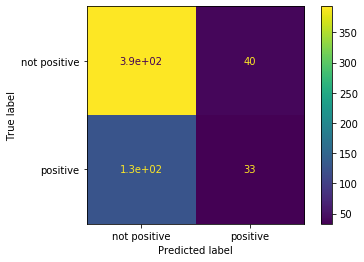

In [21]:
plot_confusion_matrix(model_f, X_test, y_test, display_labels=['not positive', 'positive']);

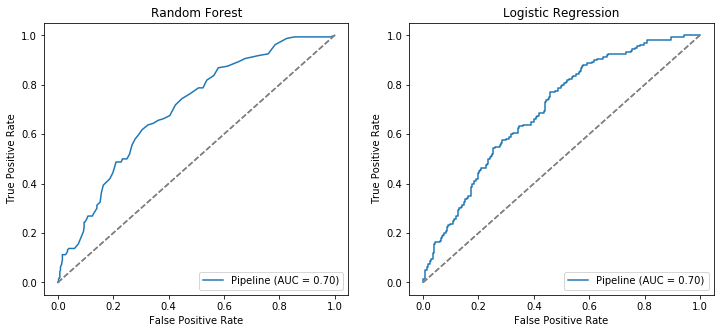

In [22]:
# How to plot side-by-side figures
## Create subplots
fig, (ax1, ax2) = plt.subplots(ncols=2, nrows=1, figsize=(12,5))

## Plot ROC curves
plot_roc_curve(model_f, X_test, y_test, ax=ax1)
plot_roc_curve(model_l, X_test, y_test, ax=ax2)

## Plot center lines
ax1.plot([(0,0), (1,1)], color='grey', linestyle='--')
ax2.plot([(0,0), (1,1)], color='grey', linestyle='--')

## Set titles
ax1.set_title('Random Forest')
ax2.set_title('Logistic Regression')

plt.show()

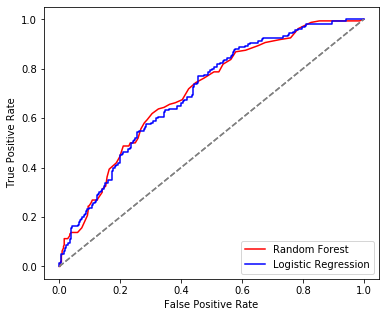

In [23]:
# Plot two ROC curves together
fig, ax1 = plt.subplots(ncols=1, nrows=1, figsize=(6,5))

## Plot ROC curves
plot_roc_curve(model_f, X_test, y_test, ax=ax1, 
               color='red', label='Random Forest')
plot_roc_curve(model_l, X_test, y_test, ax=ax1, 
               color='blue', label='Logistic Regression')

## Plot center line
ax1.plot([(0,0), (1,1)], color='grey', linestyle='--')

#Feature Importances

In [24]:
# Logistic Regression
# This code stopped working after setting select KBest to 6
#pd.Series(model_l.named_steps['logisticregression'].coef_[0], index=X_train.columns).sort_values().plot(kind='barh')

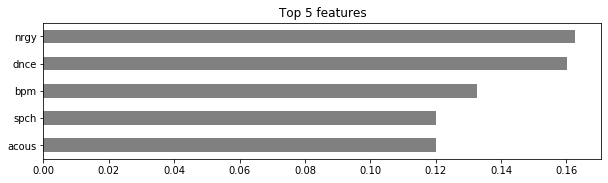

In [25]:
# Get feature importances
rf = model_f.named_steps['randomforestclassifier']
importances = pd.Series(rf.feature_importances_, X_train.columns)

#Plot feature importances
n = 5
plt.figure(figsize=(10,n/2))
plt.title(f'Top {n} features')
importances.sort_values()[-n:].plot.barh(color='grey');

#Drop Column Importance

In [26]:
column = 'nrgy'

# Fit without column
pipeline = make_pipeline(
    ce.OrdinalEncoder(),
    SimpleImputer(strategy='median'), 
    RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
)
pipeline.fit(X_train.drop(columns=column), y_train)
score_without = pipeline.score(X_val.drop(columns=column), y_val)
print(f'Validation Accuracy without {column}: {score_without}')

# Fit with column
pipeline = make_pipeline(
    ce.OrdinalEncoder(),
    SimpleImputer(strategy='median'), 
    RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
)
pipeline.fit(X_train, y_train)
score_with = pipeline.score(X_val, y_val)
print(f'Validation Accuracy with {column}: {score_with}')

# Compare the error with & without column
print(f'Drop-Column Importance for {column}: {score_with - score_without}')

Validation Accuracy without nrgy: 0.7658227848101266
Validation Accuracy with nrgy: 0.7869198312236287
Drop-Column Importance for nrgy: 0.021097046413502185


In [27]:
transformers = make_pipeline(
    ce.OrdinalEncoder(),
    SimpleImputer(strategy='median')
)

X_train_transformed = transformers.fit_transform(X_train)
X_test_transformed = transformers.transform(X_test)

model = RandomForestClassifier(random_state=42, n_jobs=-1)
model.fit(X_train_transformed, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [28]:
print(f'scikit-learn=={sklearn.__version__}')
print(f'category_encoders=={ce.__version__}')
print(f'joblib=={joblib.__version__}')

scikit-learn==0.22.1
category_encoders==2.2.2
joblib==0.14.1


In [29]:
import eli5
from eli5.sklearn import PermutationImportance

permuter = PermutationImportance(
    model,
    scoring='accuracy',
    n_iter=5,
    random_state=42
)

permuter.fit(X_test_transformed, y_test)

D:\CORONA2020-Online\INFO197P\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.metrics.scorer module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)
D:\CORONA2020-Online\INFO197P\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.feature_selection.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.feature_selection. Anything that cannot be imported from sklearn.feature_selection is now part of the private API.
  warnings.warn(message, FutureWarning)


PermutationImportance(cv='prefit',
                      estimator=RandomForestClassifier(bootstrap=True,
                                                       ccp_alpha=0.0,
                                                       class_weight=None,
                                                       criterion='gini',
                                                       max_depth=None,
                                                       max_features='auto',
                                                       max_leaf_nodes=None,
                                                       max_samples=None,
                                                       min_impurity_decrease=0.0,
                                                       min_impurity_split=None,
                                                       min_samples_leaf=1,
                                                       min_samples_split=2,
                                                       min_weight_fr

In [30]:
feature_names = X_test.columns.tolist()
pd.Series(permuter.feature_importances_, feature_names).sort_values()

dB      -0.017201
spch    -0.014840
live    -0.013828
pop     -0.011467
bpm     -0.010118
acous   -0.005059
nrgy     0.014503
dnce     0.020573
dtype: float64

In [31]:
eli5.show_weights(
    permuter,
    top=None,
    feature_names=feature_names
)

Weight,Feature
0.0206 ± 0.0190,dnce
0.0145 ± 0.0162,nrgy
-0.0051 ± 0.0111,acous
-0.0101 ± 0.0162,bpm
-0.0115 ± 0.0153,pop
-0.0138 ± 0.0033,live
-0.0148 ± 0.0123,spch
-0.0172 ± 0.0112,dB


#Gradient Boosting Classifier Model

In [32]:
!pip install xgboost
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [33]:
column = 'nrgy'

model_with = make_pipeline(
    ce.OrdinalEncoder(),
    SimpleImputer(),
    XGBClassifier(n_jobs=-1)
)

model_with.fit(X_train, y_train)

print(f'Validation Accuracy with {column} included:',
      model_with.score(X_val, y_val))
print(f'Testing Accuracy with {column} included:',
      model_with.score(X_test, y_test))

Validation Accuracy with nrgy included: 0.7573839662447257
Testing Accuracy with nrgy included: 0.7200674536256324


In [34]:
model_without = make_pipeline(
    ce.OrdinalEncoder(),
    SimpleImputer(),
    XGBClassifier(n_jobs=-1)
)

model_without.fit(X_train.drop(columns=column), y_train)

print(f'Testing Accuracy with {column} dropped:',
      model_without.score(X_test.drop(columns=column), y_test))
print(f'Validation Accuracy with {column} dropped:',
      model_without.score(X_val.drop(columns=column), y_val))

Testing Accuracy with nrgy dropped: 0.7284991568296796
Validation Accuracy with nrgy dropped: 0.7447257383966245


In [35]:
X_test_permute = X_test.copy()
X_test_permute[column] = np.random.permutation(X_test_permute[column])
X_val_permute = X_val.copy()
X_val_permute[column] = np.random.permutation(X_val_permute[column])

print(f'Testing Accuracy with {column} permuted:',
      model_without.score(X_test_permute.drop(columns=column), y_test))
print(f'Validation Accuracy with {column} permuted:',
      model_without.score(X_val_permute.drop(columns=column), y_val))

Testing Accuracy with nrgy permuted: 0.7284991568296796
Validation Accuracy with nrgy permuted: 0.7447257383966245


In [36]:
from sklearn.inspection import permutation_importance

In [37]:
perm_imp = permutation_importance(model_with, X_test, y_test, n_jobs=-1)
perm2_imp = permutation_importance(model_with, X_val, y_val, n_jobs=-1)

In [38]:
perm_imp.keys()

dict_keys(['importances_mean', 'importances_std', 'importances'])

In [39]:
data = {'importances_mean' : perm_imp['importances_mean'],
        'importances_std' : perm_imp['importances_std']}

df = pd.DataFrame(data, index=X_train.columns)
df.sort_values('importances_mean', ascending=False, inplace=True)

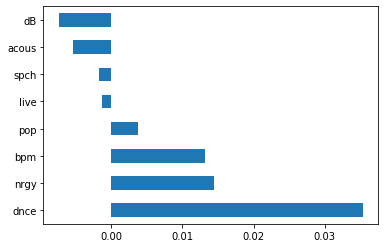

In [40]:
df.head(10).importances_mean.plot(kind='barh')

#PDP Plot

In [41]:
from pdpbox.pdp import pdp_isolate, pdp_interact, pdp_plot, pdp_interact_plot

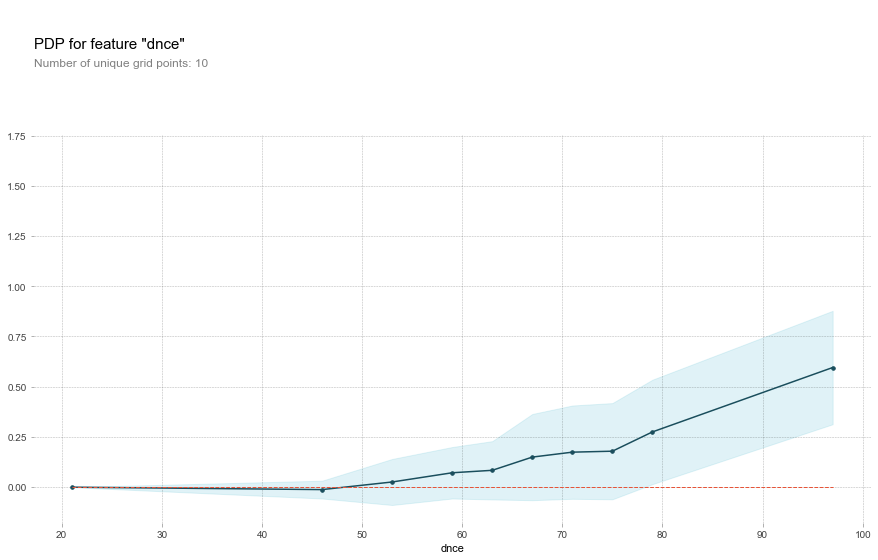

In [49]:
feature = 'dnce'

isolated = pdp_isolate(
    model=model_with,
    dataset=X_val,
    model_features=X_val.columns,
    feature=feature
)

pdp_plot(isolated, feature_name=feature);

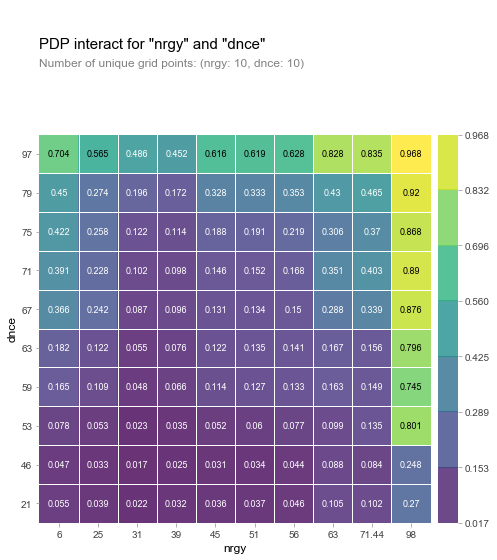

In [43]:
features = ['nrgy', 'dnce']

interaction = pdp_interact(
    model=model_with,
    dataset=X_val,
    model_features=X_val.columns,
    features=features
)

pdp_interact_plot(interaction, plot_type='grid', feature_names=features);

Looking at the plot above, it seems dnce and nrgy are positively correlated.

# Shapley Values

In [44]:
from sklearn.ensemble import RandomForestRegressor

#oe = ce.OrdinalEncoder()
#oe.fit_transform(X_train['top genre'])

model_rfr = RandomForestRegressor(n_estimators=50, n_jobs=10)

model_rfr.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=50, n_jobs=10, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [45]:
# Choose one observation to treat as an "applicant"
song_profile = X_val.iloc[[1]]
song_profile

,bpm,nrgy,dnce,dB,live,acous,spch,pop
869,92,62,60,-4,16,12,26,71


In [46]:
import shap

In [48]:
explainer = shap.TreeExplainer(model_rfr)
shap_values = explainer.shap_values(song_profile)
shap.initjs()
shap.force_plot(
    base_value=explainer.expected_value,
    shap_values=shap_values,
    features=song_profile
)